# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Importing Data

In [2]:
data = pd.read_excel(r'C:\Users\aecarino\Videos\Personal\EW\Dataset.xlsb', engine='pyxlsb')

# Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          4712 non-null   object 
 1   Var1        4712 non-null   float64
 2   Var2        4712 non-null   float64
 3   Var3        4712 non-null   float64
 4   Var4        4712 non-null   float64
 5   Var5        4712 non-null   float64
 6   Var6        4712 non-null   float64
 7   Var7        4712 non-null   float64
 8   Var8        4712 non-null   float64
 9   Var9        4712 non-null   float64
 10  Var10       4712 non-null   float64
 11  Var11       4712 non-null   float64
 12  Var12       4712 non-null   float64
 13  Var13       4712 non-null   float64
 14  Age         4712 non-null   int64  
 15  County      4712 non-null   object 
 16  ZIP Code    4712 non-null   int64  
 17  Target_flg  4712 non-null   object 
dtypes: float64(13), int64(2), object(3)
memory usage: 662.8+ KB


In [4]:
data.head()

ID      Var1          Var2      Var3      Var4      Var5      Var6  \
0   AA1293  15932.19   6732.154506  0.000000  1.031774  0.435977  0.000000   
1    AA383  36130.00  24555.144750  0.000000  1.471382  1.000000  0.000000   
2    AA220  34816.21  16337.682580  0.000000  0.490552  0.230194  0.000000   
3  AA18331  11951.59   4865.167981 -0.302664  0.362050  0.147381  0.000000   
4   AA7855  15183.07  11935.877330 -0.168730  0.774283  0.608687 -0.084055   

       Var7      Var8  Var9     Var10     Var11     Var12     Var13  Age  \
0  1.031774  0.435977   0.0  1.031774  0.435977  1.031774  0.435977   10   
1  1.471382  1.000000   0.0  1.281334  0.870837  1.064135  0.723222   10   
2  0.437241  0.205178   0.0  0.429344  0.201472  0.429344  0.201472    8   
3  0.519191  0.211349   0.0  0.477323  0.194305  0.368289  0.149921    6   
4  0.931445  0.732238   0.0  1.016923  0.799434  0.921456  0.724385    6   

       County  ZIP Code Target_flg  
0  Tippecanoe     47970          Y  
1      Greene     47424          Y  
2      Shelby     46150          N  
3   Kosciusko     46542          N  
4    Hamilton     46031          Y

# Data Cleaning

In [5]:
data['Target_flg'].value_counts()

Y    2533
N    2179
Name: Target_flg, dtype: int64

In [6]:
data['Target_flg'] = data['Target_flg'].map({'Y': 1, 'N': 0})
data['Target_flg'].value_counts()

1    2533
0    2179
Name: Target_flg, dtype: int64

In [7]:
cleaned = data.drop(['ID','County','ZIP Code'],axis=1)

cleaned

Var1           Var2      Var3      Var4      Var5      Var6  \
0      15932.19    6732.154506  0.000000  1.031774  0.435977  0.000000   
1      36130.00   24555.144750  0.000000  1.471382  1.000000  0.000000   
2      34816.21   16337.682580  0.000000  0.490552  0.230194  0.000000   
3      11951.59    4865.167981 -0.302664  0.362050  0.147381  0.000000   
4      15183.07   11935.877330 -0.168730  0.774283  0.608687 -0.084055   
...         ...            ...       ...       ...       ...       ...   
4707  246985.74  127293.780000  0.000000  0.409046  0.210818 -0.771760   
4708  247183.08  128226.406200 -0.255300  1.173763  0.608890  0.000000   
4709  247846.94   77886.160400 -0.215637  1.983185  0.623218  0.000000   
4710  248397.73  189323.510700 -0.045687  1.241678  0.946381  0.000000   
4711  250000.00  231451.612900  0.000000  1.080139  1.000000  0.000000   

          Var7      Var8      Var9     Var10     Var11     Var12     Var13  \
0     1.031774  0.435977  0.000000  1.031774  0.435977  1.031774  0.435977   
1     1.471382  1.000000  0.000000  1.281334  0.870837  1.064135  0.723222   
2     0.437241  0.205178  0.000000  0.429344  0.201472  0.429344  0.201472   
3     0.519191  0.211349  0.000000  0.477323  0.194305  0.368289  0.149921   
4     0.931445  0.732238  0.000000  1.016923  0.799434  0.921456  0.724385   
...        ...       ...       ...       ...       ...       ...       ...   
4707  0.246774  0.127185 -0.001382  1.081207  0.557242  1.082702  0.558013   
4708  1.576155  0.817631  0.000000  1.576015  0.817559  1.575875  0.817486   
4709  2.528403  0.794553  0.000000  0.936864  0.294411  0.273582  0.085973   
4710  1.301123  0.991688 -0.030929  1.268468  0.966799  1.308952  0.997656   
4711  1.080139  1.000000  0.000000  1.080139  1.000000  1.080139  1.000000   

      Age  Target_flg  
0      10           1  
1      10           1  
2       8           0  
3       6           0  
4       6           1  
...   ...         ...  
4707   43           1  
4708   43           1  
4709   43           0  
4710   43           1  
4711   43           1  

[4712 rows x 15 columns]

# Exploratory Data Analysis (EDA)

<AxesSubplot:>

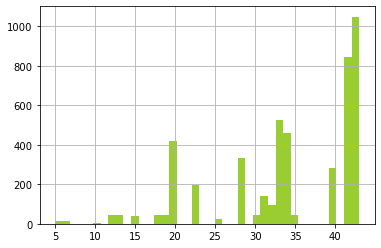

In [8]:
cleaned['Age'].hist(bins=40, color='yellowgreen')

<AxesSubplot:ylabel='Var1'>

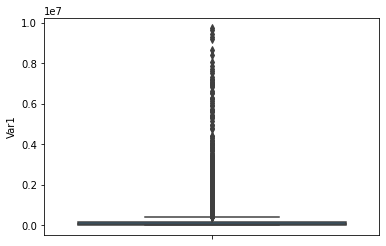

In [9]:
sns.boxplot(y=cleaned['Var1'])

In [10]:
cleaned['Var1'].max()

9762227.56

In [11]:
cleaned['Var1'].min()

1021.23

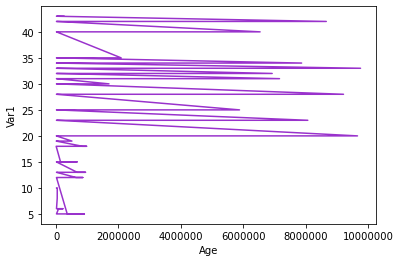

In [12]:
plt.plot(cleaned['Var1'],cleaned['Age'], color='darkorchid')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Age')
plt.ylabel('Var1')
plt.show()

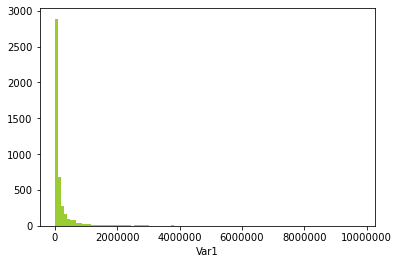

In [13]:
plt.hist(cleaned['Var1'], bins=100, color='yellowgreen')
plt.xlabel('Var1')
plt.ticklabel_format(style='plain', axis='x')

<AxesSubplot:ylabel='Var2'>

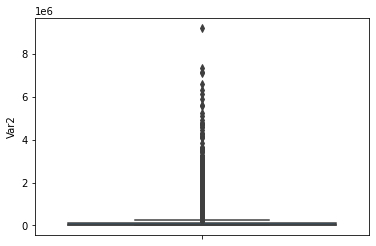

In [14]:
sns.boxplot(y=cleaned['Var2'])

In [15]:
cleaned['Var2'].max()

9211745.909

In [16]:
cleaned['Var2'].min()

797.0844932

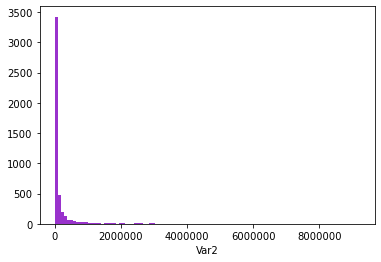

In [17]:
plt.hist(cleaned['Var2'], bins=100, color='darkorchid')
plt.xlabel('Var2')
plt.ticklabel_format(style='plain', axis='x')

Text(0.5, 0, 'Var3')

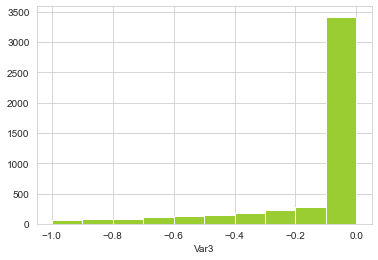

In [18]:
sns.set_style('whitegrid')
cleaned['Var3'].hist(bins=10, color='yellowgreen')
plt.xlabel('Var3')

Text(0.5, 0, 'Var4')

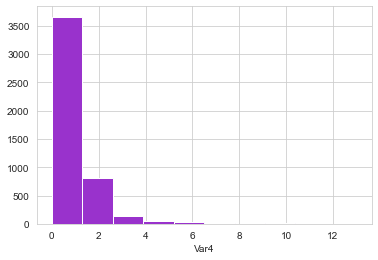

In [19]:
sns.set_style('whitegrid')
cleaned['Var4'].hist(bins=10, color='darkorchid')
plt.xlabel('Var4')

Text(0.5, 0, 'Var5')

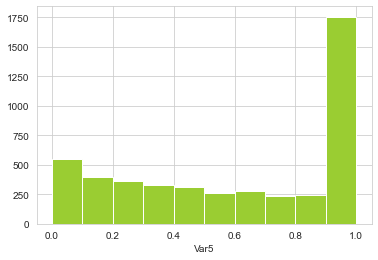

In [20]:
sns.set_style('whitegrid')
cleaned['Var5'].hist(bins=10, color='yellowgreen')
plt.xlabel('Var5')

Text(0.5, 0, 'Var6')

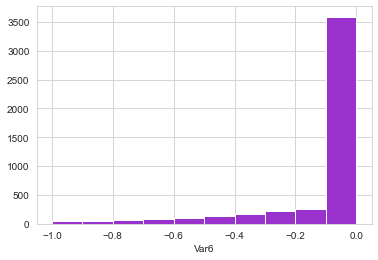

In [21]:
sns.set_style('whitegrid')
cleaned['Var6'].hist(bins=10, color='darkorchid')
plt.xlabel('Var6')

Text(0.5, 0, 'Var7')

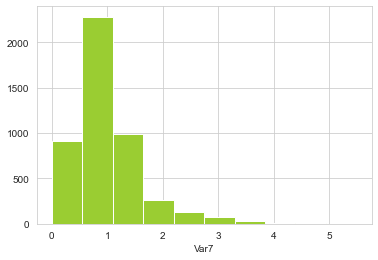

In [22]:
sns.set_style('whitegrid')
cleaned['Var7'].hist(bins=10, color='yellowgreen')
plt.xlabel('Var7')

Text(0.5, 0, 'Var8')

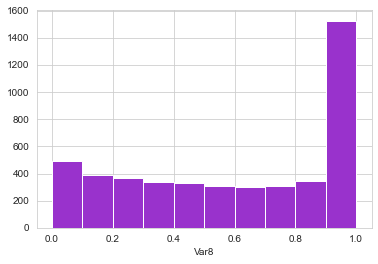

In [23]:
sns.set_style('whitegrid')
cleaned['Var8'].hist(bins=10, color='darkorchid')
plt.xlabel('Var8')

Text(0.5, 0, 'Var9')

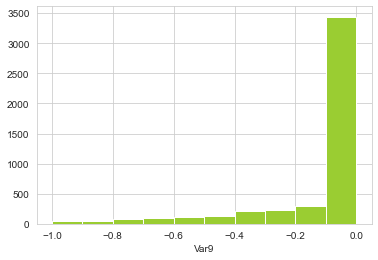

In [24]:
sns.set_style('whitegrid')
cleaned['Var9'].hist(bins=10, color='yellowgreen')
plt.xlabel('Var9')

Text(0.5, 0, 'Var10')

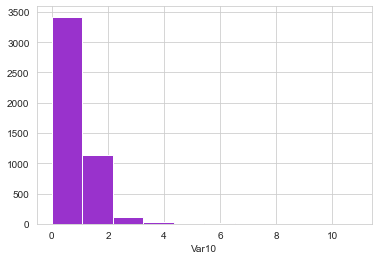

In [25]:
sns.set_style('whitegrid')
cleaned['Var10'].hist(bins=10, color='darkorchid')
plt.xlabel('Var10')

Text(0.5, 0, 'Var11')

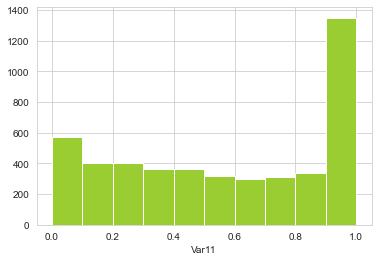

In [26]:
sns.set_style('whitegrid')
cleaned['Var11'].hist(bins=10, color='yellowgreen')
plt.xlabel('Var11')

Text(0.5, 0, 'Var12')

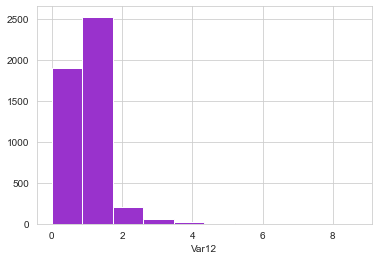

In [27]:
sns.set_style('whitegrid')
cleaned['Var12'].hist(bins=10, color='darkorchid')
plt.xlabel('Var12')

Text(0.5, 0, 'Var13')

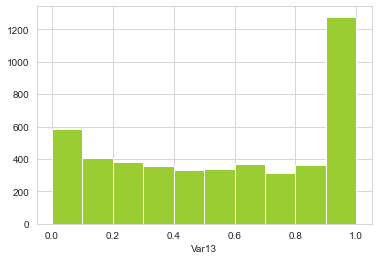

In [28]:
sns.set_style('whitegrid')
cleaned['Var13'].hist(bins=10, color='yellowgreen')
plt.xlabel('Var13')

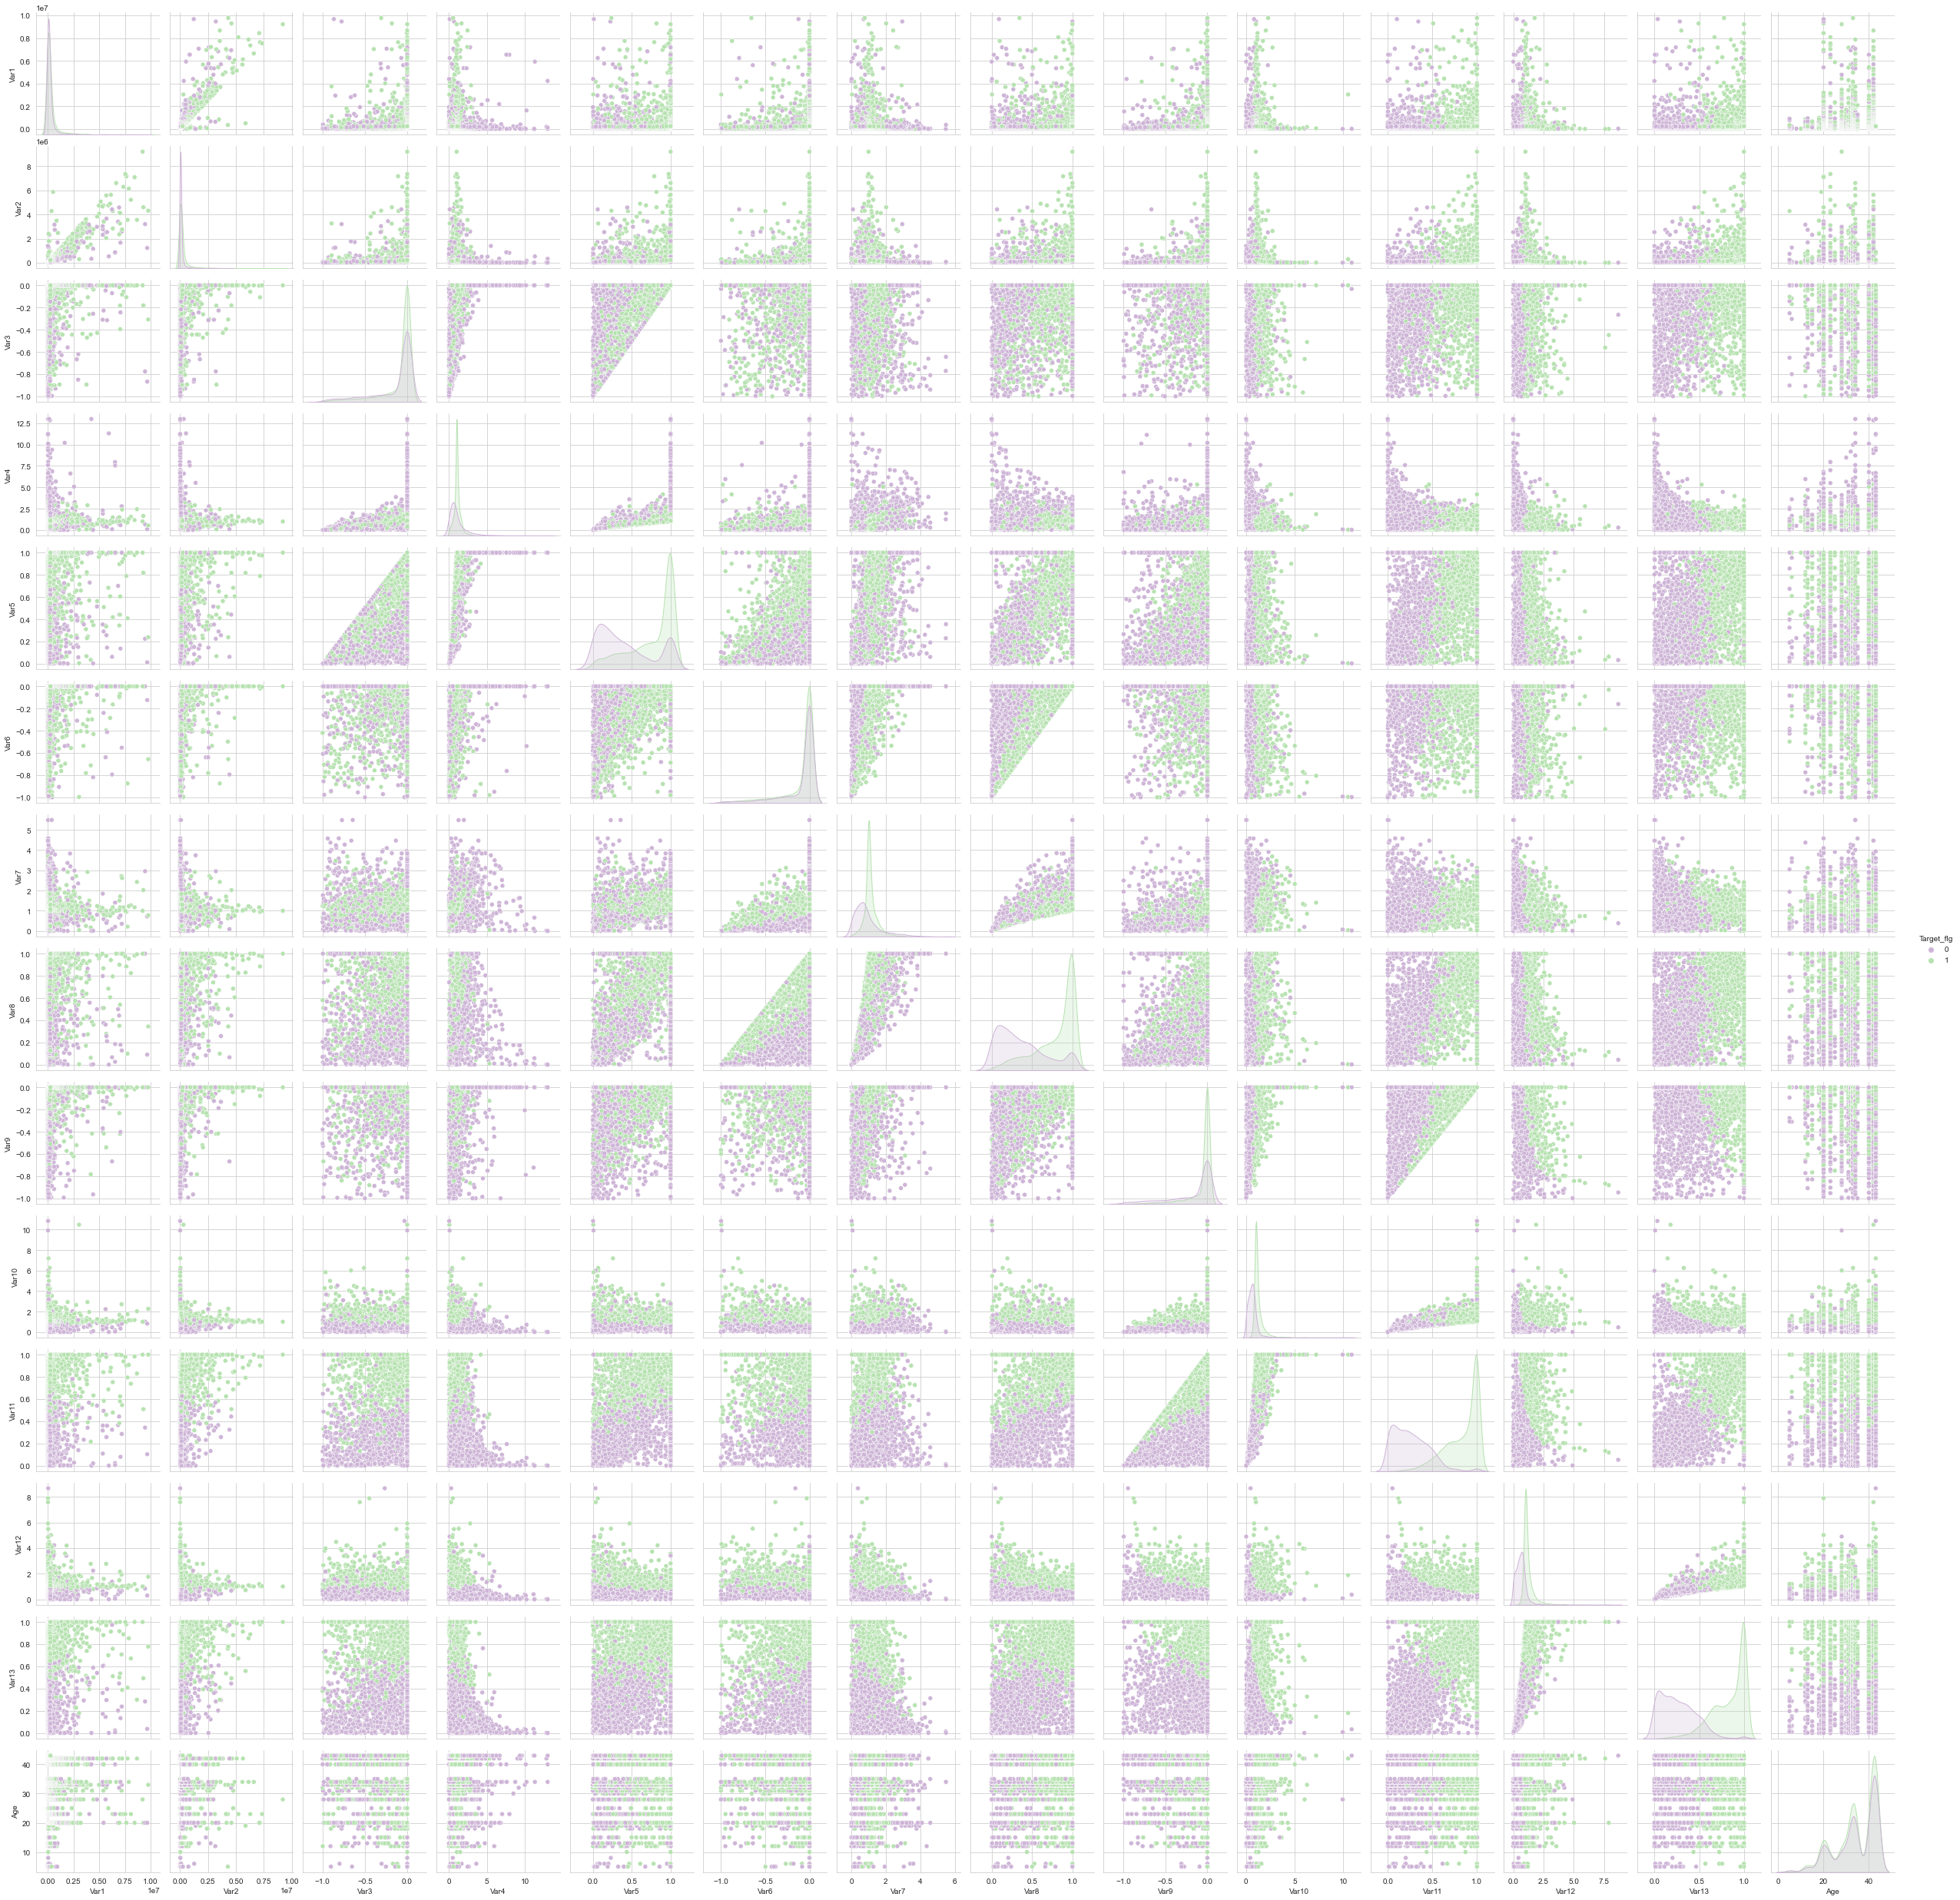

In [29]:
sns.pairplot(cleaned,hue='Target_flg',palette='PRGn')

# Finalizing Data

In [30]:
final = cleaned.drop(['Age','Var3','Var5','Var6','Var8','Var9','Var11','Var13'],axis=1)

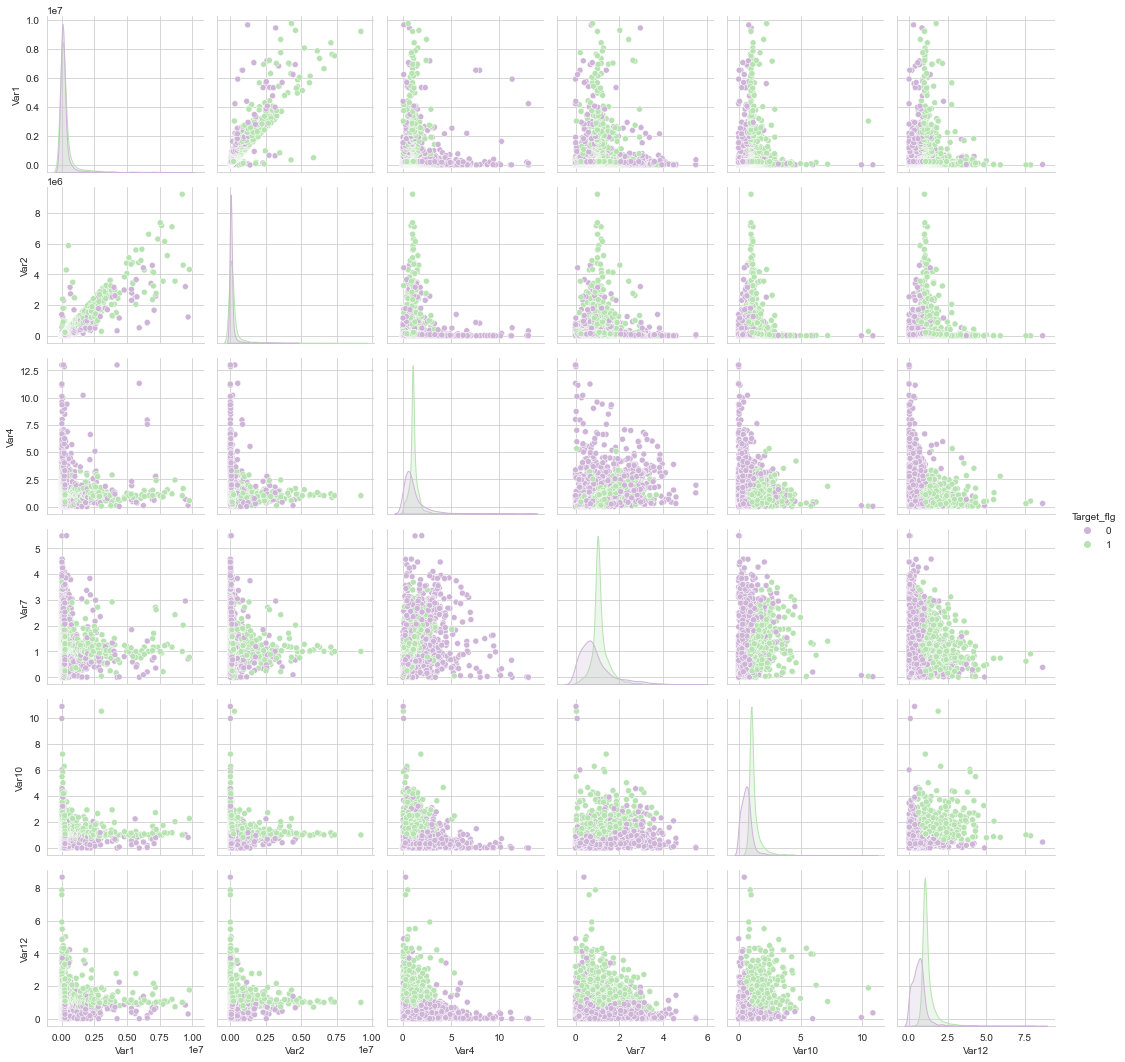

In [31]:
sns.pairplot(final,hue='Target_flg',palette='PRGn')

# Logistic Regression

In [32]:
X_train, X_test, y_train, y_test = train_test_split(final.drop('Target_flg', axis=1), 
                                                    final['Target_flg'], test_size=None, 
                                                    random_state=101)

In [33]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [34]:
predictions = logmodel.predict(X_test)

In [35]:
predictions

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       534
           1       0.76      0.83      0.79       644

    accuracy                           0.76      1178
   macro avg       0.76      0.75      0.76      1178
weighted avg       0.76      0.76      0.76      1178



In [37]:
confusion_matrix(y_test,predictions)

array([[363, 171],
       [111, 533]], dtype=int64)